# Introduction à l'apprentissage automatique: TP2 - Exercice 2 

<br>

## Un problème de bioinformatique: philogénie moléculaire

<br> 

L'objectif de cet exercice est d'étudier une application du partitionnement (classification non supervisée) à un problème de _bioinformatique_, la science du traitement automatique des données biologiques. Naturellement, le problème ne sera pas traité de manière exhaustive pour rester accessible. Il s'agit d'un sujet de recherche en soi.

<br>

__Avertissement__: le rédacteur du sujet n'étant pas biologiste, la présentation peut être jugée approximative par un spécialiste. 

<br>

Les organismes vivants peuvent être classés selon des critères physiologiques observés: mode de respiration, de digestion, de reproduction, nombres de membres... Voir la [classification classique des espèces](https://fr.wikipedia.org/wiki/Classification_scientifique_des_esp%C3%A8ces#Classification_traditionnelle_ou_classique).

Avec les progrès du séquençage du génôme et celle des moyens de calcul, les outils informatiques permettent depuis la fin du XXème siècle de classifier le vivant à partir de données moléculaires, notamment les gènes (qui codent l'information permettant de synthétiser les protéines). Chaque gène est codé dans l'ADN par une succession de quatre nucléotides: adénine (**A**), guanine (**G**), cytosine (**C**) et thymine (**T**). Un gène est donc représenté par un mot sur cet alphabet de quatre lettres. La _phylogénie moléculaire_ permet d'établir un arbre retraçant l'évolution des espèces à partir de ces données.

En effet, dans le cadre de la théorie de l'évolution, les gènes des organismes modernes sont considérés comme étant issus de gènes ancestraux communs à plusieurs espèces. Les gènes issus du même ancètre sont dits _homologues_. L'évolution se traduit par des insertions, suppressions, ou substitutions dans le génome. Un faible nombre d'insertions, suppressions, substitutions entre deux gènes homologues indique une proximité évolutive entre les espèces auxquelles appartiennent ces gènes.

Une manière d'obtenir un arbre phylogénique est de construire le dendrogramme associé à une classification hiérarchique ascendante basé sur une distance entre des gènes homologues appartenant à différentes espèces.

Une distance possible est la _distance d'édition_.

## 1. Distance d'édition 

Soient $x$ et $y$ deux mots sur un alphabet.
On note $d(x,y)$ le nombre minimal d’insertions, de suppressions, ou de substitutions de caractères
pour passer du mot $x$ au mot $y$. 

Par exemple, on peut passer de "mines" à "mimes" des trois manières suivantes :

* mines $\rightarrow$ mies (suppression) $\rightarrow$ mimes (insertion)
* mines $\rightarrow$ mins (suppression) $\rightarrow$ mimns (insertion) $\rightarrow$ mimens (insertion) $\rightarrow$
mimes (suppression)
* mines $\rightarrow$ mimes (substitution)

La première solution nécessite 2 insertions/suppressions, la deuxième 4, la troisième une substitution.

Dans cet exemple, $d(\text{mines},\text{mimes}) = 1$.

<br>

On peut démontrer que $d$ définit une distance entre mots. Si $x$, $y$, $z$ sont des mots:
* $d(x,y)=d(y,x)$ (symétrie), 
* $d(x,y)=0 \Leftrightarrow x=y$ (séparation), 
* $d(x,z) \leqslant d(x,y)+d(y,z)$ (inégalité triangulaire).

La distance $d$ est la _distance d'édition_, aussi appelée _distance de Levenshtein_.

Si vous souhaitez en savoir davantage, lisez ce [polycopié](https://members.loria.fr/FSur/enseignement/RO/poly_RO_FSur.pdf) pages 13-14 et 76-78.

La fonction suivante ([source](https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance#Python)) implémente l'algorithme de calcul de la distance d'édition par _programmation dynamique_, conformément aux explications du polycopié.

In [1]:
# https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance#Python
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

Des implémentations plus rapides sont disponibles dans des librairies que nous n'utiliserons pas dans cet exercice, pour éviter des problèmes d'installation.

<br>

__Si vous avez besoin d'une distance d'édition rapide pour un projet__ (potentiellement 100x plus rapide que la fonction précédente): vous pouvez installer https://pypi.org/project/editdistance/ :

`conda install editdistance` puis `import editdistance` dans votre programme Python. 

__Question 1__. Calculez les distances d'édition entre différents mots de votre choix et vérifiez que la distance obtenue correspond bien à la définition.

In [2]:
# votre code ici:




## 2. Données génétiques


On considère les séquences ADN du _gène mitochondrial du cytochrome b_ (ce gène intervient dans le métabolisme énergétique des cellules) pour douze ongulés. Ce gène est souvent utilisé en philogénétique.

Les données de cet exercice sont extraites d'un [TP à l'Université de Lille](https://www.fil.univ-lille.fr/~varre/enseignement/enseignement.html), sauf pour le cochon ([source](https://www.ebi.ac.uk/ena/browser/view/CAA39742)). 

Par curiosité, on ajoute la séquence ADN correspondant à ce gène pour l'humain ([source](https://www.ncbi.nlm.nih.gov/gene?Db=gene&Cmd=ShowDetailView&TermToSearch=4519)) et le béluga (un cétacé) ([source](https://www.ebi.ac.uk/ena/browser/view/MF919123)).


In [3]:
Horse = "ATGACAAACATCCGGAAATCTCACCCACTAATTAAAATCATCAATCACTCTTTTATTGACCTACCAGCCCCCTCAAACATTTCATCATGATGAAACTTCGGCTCCCTCCTAGGAATCTGCCTAATCCTCCAAATCTTAACAGGCCTATTCCTAGCCATACACTACACATCAGACACGACAACTGCCTTCTCATCCGTCACTCACATCTGCCGAGACGTTAACTACGGATGAATTATCCGCTACCTCCATGCCAACGGAGCATCAATATTTTTTATCTGCCTCTTCATTCACGTAGGACGCGGCCTCTACTACGGCTCTTACACATTCCTAGAGACATGAAACATTGGAATCATCCTACTTTTCACAGTTATAGCTACAGCATTCATGGGCTATGTCCTACCATGAGGCCAAATATCCTTTTGAGGAGCAACAGTCATCACAAACCTCCTATCAGCAATTCCCTACATCGGTACTACCCTCGTCGAATGAATCTGAGGTGGATTCTCAGTAGACAAAGCCACCCTTACCCGATTTTTTGCTTTCCACTTCATCCTACCCTTCATCATCACAGCCCTGGTAGTCGTACATTTACTATTTCTTCACGAAACAGGATCTAACAACCCCTCAGGGATCCCATCCGATATGGACAAAATCCCATTCCACCCATATTATACAATTAAAGACATCCTAGGACTCCTCCTCCTGATCTTGCTCCTACTAACTCTAGTATTATTCTCCCCCGACCTCCTAGGAGACCCAGACAACTACACCCCAGCTAACCCTCTCAGCACTCCCCCTCATATTAAACCAGAATGGTACTTCCTGTTTGCCTACGCCATCCTACGCTCCATTCCCAACAAACTAGGAGGCGTATTAGCCCTAATCCTCTCCATCCTGATCCTAGCACTCATCCCCACCCTCCACATATCAAAACAACGAAGCATAATGTTCCGGCCTCTCAGCCAATGCGTATTCTGACTCTTAGTGGCAGACTTACTGACACTAACATGAATCGGCGGACAGCCAGTGGAACACCCATACGTAATTATCGGCCAACTGGCCTCAATCCTCTACTTCTCCCTAATTCTCATTTTTATACCACTCGCAAGCACCATCGAAAACAATCTTCTAAAATGAAGA"

Giraffe = "ATGATCAACATCCGAAAGTCCCACCCACTAATAAAAATTGTAAATAACGCACTAATCGATCTACCAGCCCCATCAAATATCTCATCATGATGAAACTTCGGCTCCCTACTAGGCATCTGCCTCATTTTACAAATTCTAACAGGCCTATTTCTAGCAATACACTACACACCTGACACAACAACAGCGTTCTCCTCTGTCACCCATATTTGCCGAGATGTTAACTACGGTTGAATCATCCGATATATACACGCAAATGGGGCATCCATATTCTTCATCTGCTTATTCATGCATGTAGGACGGGGCCTATACTACGGATCGTATACCTTCCTAGAAACATGAAACATTGGAGTAATCCTCCTATTCACAGTAATAGCCACAGCTTTTATAGAGTACGTCCTACCATGAGGACAAATATCATTTTGAGGAGCAACAGTCATTACTAATCTCCTATCAGCAATCCCATATATCGGCACAAATCTAGTCGAATGAATCTGAGGGGGCTTCTCAGTAGATAAAGCAACCCTTACCCGATTCTTCGCCTTCCACTTCATTCTCCCATTCATCATTATAGCACTCACTATAGTCCACCTACTCTTTCTTCACGAAACAGGATCAAACAACCCAATAGGAATTCCATCAGACATAGACAAAATCCCGTTCCACCCCTACTACACTATCAAAGATATCTTAGGGGCACTTCTATTAATTCTAGTCCTAATACTTCTAGTCCTATTTACACCCGACCTGCTCGGAGACCCAGATAACTACACACCAGCCAACCCACTCAATACTCCTCCCCATATTAAACCAGAATGATACTTTCTATTTGCATACGCAATCCTACGATCAATCCCCAACAAACTAGGAGGAGTCCTAGCCCTAGTTCTCTCCATCCTCATCCTCATCTTCATACCCCTACTCCACACATCCAAACAACGAAGTATGATATTTCGACCATTCAGTCAATGCCTATTTTGAATTCTAGTAGCGGACCTGCTAACACTCACATGAATTGGAGGACAGCCAGTTGAACACCCATTCATCATCATCGGACAACTAGCATCTATTATGTACTTTCTCATCATCCTAGTGTTAATACCAGTCACTAGTGCAATCCAAAACAACCTTCTAAAATGAAGA"

Goat = "ATGACCAACATCCGAAAGACCCACCCATTAATAAAAATTGTAAACAACGCATTTATTGACCTCCCAACCCCATCAAACATCTCATCATGATGAAACTTTGGATCCCTCCTAGGAATTTGCCTAATCTTACAAATCCTGACAGGCCTATTCCTAGCAATACACTATACATCCGACACAATAACAGCATTTTCCTCTGTAACTCACATTTGTCGAGATGTAAATTATGGCTGAATCATCCGATACATACACGCAAACGGAGCATCAATATTCTTTATCTGCCTATTCATACATATCGGACGAGGTCTATATTATGGATCATATACCTTTCTAGAAACATGAAACATTGGAGTAATCCTCCTGCTCGCAACAATGGCCACAGCATTCATAGGCTATGTTTTACCATGAGGACAAATATCATTTTGAGGGGCAACAGTCATCACTAATCTTCTTTCAGCAATCCCATATATTGGCACAAACCTAGTCGAATGAATCTGAGGGGGGTTCTCAGTAGACAAAGCCACTCTCACCCGATTCTTCGCCTTCCACTTTATCCTCCCATTCATCATCACAGCCCTCGCCATAGTCCACCTGCTCTTCCTCCACGAAACAGGATCGAACAACCCCACAGGAATTCCATCAGACACAGATAAAATCCCATTTCACCCTTACTACACCATTAAAGATATCTTAGGCGCCATGCTACTAATTCTTGTTCTAATATTACTAGTACTATTCACACCCGACCTACTCGGAGACCCAGACAACTATATCCCAGCAAATCCACTCAATACACCCCCTCACATTAAACCTGAGTGGTATTTCCTATTTGCATACGCAATCCTACGATCAATCCCCAACAAACTAGGAGGAGTCCTAGCCCTAGTCCTCTCAATCCTAATCTTAGTACTTGTACCCTTCCTCCACACATCTAAACAACGAAGCATAATATTCCGCCCAATCAGCCAATGCATATTCTGAATCCTGGTAGCAGATCTATTAACACTCACATGAATTGGAGGACAGCCAGTCGAACATCCCTACATTATTATTGGACAACTAGCATCTATTATATATTTCCTCATCATTCTAGTAATAATACCAGCAGCTAGCACCATTGGAAACAACCTTCTAAAATGAAGA"

Sheep = "ATGACCAACATCCGAAAAACCCACCCACTAATAAAAATTGTAAACAACGCATTCATTGACCTCCCAGCTCCATCAAATATTTCATCATGATGAAACTTTGGCTCCCTCCTAGGCATTTGCTTAATTTTACAGATTCTAACAGGCCTATTCCTAGCAATACACTATACACCCGACACAACAACAGCATTCTCCTCTGTAACCCACATTTGCCGAGACGTGAACTATGGCTGAATTATCCGATATATACACGCAAACGGGGCATCAATATTTTTTATCTGCCTATTTATGCATGTAGGACGAGGCCTATATTATGGATCATATACCTTCCTAGAAACATGAAACATCGGAGTAATCCTCCTATTTGCGACAATAGCCACAGCATTCATAGGCTATGTCTTACCATGAGGACAAATATCATTCTGAGGAGCAACAGTTATTACCAACCTCCTTTCAGCAATTCCATATATTGGCACAAACCTAGTCGAATGAATCTGGGGAGGATTCTCAGTAGACAAAGCTACCCTCACCCGATTTTTCGCCTTTCACTTTATTTTCCCATTCATCATCGCAGCCCTCGCCATAGTTCACCTACTCTTCCTCCACGAAACAGGATCCAACAACCCCACAGGAATTCCATCGGACACAGATAAAATTCCCTTCCACCCTTATTACACCATTAAAGACATCCTAGGCGCCATACTACTAATCCTTGCCCTCATGCTACTAGTACTATTCACACCTGACTTACTCGGAGACCCAGATAACTATACCCCAGCAAACCCACTCAACACACCCCCTCACATTAAACCTGAATGATATTTCCTATTTGCATACGCAATCCTACGATCAATTCCCAATAAACTAGGAGGAGTCTTAGCCCTAGTCCTCTCGATCCTAATCCTAGTACTCGTACCTTTCCTCCACACATCCAAACAATGAAGCATAATATTCCGACCAATTAGTCAATGTATATTCTGAATCTTAGGAGCAGACCTACTAACACTCACATGAATTGGAGGACAGCCAGTCGAACACCCTTATATCGTCATTGGACAACTAGCATCTATTATATATTTCCTTATCATTCTAGTAGTAATACCAGTAGCTAGCACTATCGAAAATAACCTCCTAAAATGAAGA"

Hippopotamus = "ATGACAAACATCCGAAAATCTCACCCCTTAATAAAAATTATCAACGATGCATTCGTTGACCTCCCAGCTCCATCAAACATCTCATCGTGATGAAACTTCGGCTCCCTACTTGGCGTCTGCCTAATCCTACAAATTCTAACAGGCCTATTCCTGGCCATACACTACACACCAGATACACTCACCGCATTCTCATCGGTAACCCACATCTGCCGTGATGTAAACTACGGGTGAGTCATCCGCTACATACACGCAAACGGCGCATCCATCTTCTTCATCTGCCTCTTTACTCACGTAGGACGCGGCCTATACTATGGCTCCTACACATTCCTAGAAACCTGAAACATCGGAGTTATCTTACTACTCACAACCATAGCTACCGCGTTTATAGGCTACGTACTGCCATGAGGACAAATGTCATTCTGAGGGGCAACAGTCATTACCAACTTACTGTCAGCTATCCCCTATATTGGAACAGACCTAGTAGAATGAATCTGAGGAGGCTTTTCCGTAGACAAAGCCACCCTTACACGATTCTTTGCCTTCCACTTTATTCTTCCATTCGTTATCACAGCACTAGCCATCGTCCATCTACTATTCCTCCATGAAACAGGATCCAACAACCCAACAGGAATCCCCTCAAACGCAGACAAAATCCCATTCCACCCCTATTACACAATCAAGGACATCCTAGGTATCCTACTCCTAATAACAACACTACTCACACTAACCTTATTTGCCCCAGACCTCCTAGGGGACCCAGACAACTACACCCCCGCAAACCCCCTTAGCACACCACCACACATTAAACCAGAATGATATTTCCTGTTCGCGTACGCGATTCTCCGATCAATCCCCAACAAACTAGGAGGCGTCCTAGCCCTAGCTCTCTCAATCCTAATCCTGGCCCTAATCCCAATACTACACACATCCAAACAACGAAGCCTAATATTTCGACCCCTCAGCCAATGCCTGTTTTGAGCACTAATCGCCGACCTACTAACACTCACATGAATTGGAGGACAACCCGTCGAACACCCCTTCATCATCATCGGACAAGTCGCCTCAATCCTATATTTCCTCTTAATCTTAGTACTAATGCCCGTAGCAGGCATTATCGAAAACAAACTCCTAAAATGAAGA"

Bison = "ATGACTAACCTTCGAAAATCCCATCCACTAATAAAAATTGTAAATAACGCATTCATTGACCTTCCAGCTCCATCAAACATTTCATCATGATGAAACTTCGGCTCCCTCCTGGGAATATGCTTAATCCTACRAATCCTCACAGGCCTATTCCTAGCAATACACTACACATCCGATACAACAACAGCATTTTCCTCCGTTGCCCATATCTGCCGAGACGTGAACTACGGCTGAATCATCCGATACATACACGCAAACGGAGCTTCAATATTCTTTATCTGCTTATATATGCACGCAGGACGAGGCCTATATTACGGGTCTTATACCTTCCTAGAAACATGAAATATTGGAGTAATCCTTCTACTTACAGTAATAGCCACAGCATTCATAGGATACGATCTACCATGAGGACAAATATCATTTTGAGGGGCAACAGTCATTACCAACCTCCTATCAGCAATCCCATACATCGGCACAAACTTAGTCGAATGAATTTGAGGTGGATTCTCAGTAGACAAAGCAACCCTCACCCGATTCTTCGCTTTCCACTTTATCCTTCCATTTATTATTATAGCAATTGCCATAGTCCACCTATTATTCCTCCACGAAACAGGCTCCAACAATCCAACAGGAATCTCCTCAGACATAGACAAAATTCCATTTCACCCCTACTATACCATTAAAGACATCCTAGGAGCCTTATTACTAATTCTAGCCCTAATACTACTGGTACTATTCACACCCGACCTCCTCGGAGATCCAGATAACTACACCCCAGCAAATCCACTCAATACACCTCCCCACATCAAACCCGAATGATACTTCTTATTTGCATACGCAATTTTACGATCAATCCCCAATAAACTAGGAGGAGTACTAGCCCTAGCCTTCTCTATCCTAATCCTTGCCCTCATTCCCCTACTACACACCTCTAAACAACGAAGCATAATTTTCCGACCACTCAGCCAATGCCTATTCTGAACTCTAGTAGCAGACCTACTAACACTCACATGAATCGGAGGACAACCAGTCGAACACCCATATATCATCATCGGACAAATAGCATCTATTATATACTTCCTTCTCATCCTAGTACTAATACCAACAGCCGGCACAATTGAAAACAAACTACTAAAATGAAGA"

Cow = "ATGACTAACATTCGAAAGTCCCACCCACTAATAAAAATTGTAAACAATGCATTCATCGACCTTCCAGCCCCATCGAACATTTCATCATGATGGAATTTCGGTTCCCTCCTGGGAATCTGCCTAATCCTACAAATCCTCACAGGCCTATTCCTAGCAATACACTACACATCCGACACAACAACAGCATTCTCCTCTGTTACCCATATCTGCCGAGACGTGAACTACGGCTGAATCATCCGATACATACACGCAAACGGAGCTTCAATGTTTTTTATCTGCTTATATATGCACGTAGGACGAGGCTTATATTATGGGTCTTACACTTTTCTAGAAACATGAAATATCGGAGTAATCCTTCTGCTCACAGTAATAGCCACAGCATTCATAGGATACGTCCTACCATGAGGACAAATATCATTCTGAGGAGCAACAGTCATCACCAACCTCTTATCAGCAATCCCATACATCGGCACAAATTTAGTCGAATGAATCTGAGGCGGATTTTCAGTAGACAAAGCAACCCTTACCCGATTTTTCGCTTTCCACTTTATCCTTCCATTTATCATCATAGCAATTGCCATAGTCCACCTACTATTCCTCCACGAAACAGGCTCCAACAATCCAACAGGAATCTCCTCAGACGTAGACAAAATCCCATTCCACCCCTACTATACCATTAAGGACATCTTAGGGGCCCTCTTACTAATTCTAGCTCTAATACTACTAGTACTATTTGCGCCCAACCTCCTCGGAGACCCAGATAACTACACCCCAGCCAATCCACTCAACACACCTCCTCACATCAAACCCGAGTGGTACTTCCTATTTGCATATGCAATTCTACGATCAATCCCCAATAAACTAGGAGGAGTCCTAGCCCTAGTCTTCTCCATCCTAATCCTTATTCTCATTCCCTTACTACACACATCCAAACAGCGAAGCATAATATTCCGACTGCTCAGCCAATGCCTGTTCTGAATTTTAGTAGCAGACCTACTAACACTCACATGAATTGGAGGACAACCAGTTGAACATCCATACATCATCATTGGACAACTAGCATCTATCATATACTTTCTCCTCATCCTAGTGCTAATACCAACAGCCGGCACAGTTGAAAACAACCTACTAAAATGAAGA"

Rhinoceros = "ATGACCAACATCCGCAAATCCCACCCACTAATCAAAATTATCAACCACTCATTTATCGACCTGCCTACCCCATCAAACATTTCATCCTGATGAAACTTTGGCTCCCTACTAGGAATCTGCCTAATCTTACAAATCCTAACCGGACTATTCCTCGCAATACATTACACACCAGATACAACAACCGCCTTCTCATCCGTAGCCCACATCTGTCGAGACGTAAACTACGGTTGAATTATCCGCTACACCCATGCCAACGGAGCATCCATATTCTTCATCTGCCTATTTATCCACGTAGGACGAGGCCTCTACTACGGATCCTACACCTTCCTAGAAACCTGAAATATCGGAACCATCTTCCTACTCACCCTAATAGCTACAGCATTCATAGGCTACGTCCTACCATGAGGTCAAATATCCTTCTGAGGAGCCACAGTTATCACAAATCTCCTCTCAGCCATCCCATACATCGGCACCGACCTTGTAGAATGAATCTGAGGGGGATTCTCCGTAGACAAAGCCACCCTCACCCGGTTCTTTGCTTTCCACTTCATCCTCCCCTTCATCATCCTAGCCCTAGCAATTACCCACCTGCTATTCCTACATGAAACAGGATCCAACAACCCATCAGGAATCCCATCTAACATAGACAAAATCCCATTTCACCCATACTATACAATCAAAGACATCCTAGGAGCCCTACTTCTAATCCTAGCCCTACTCACCCTAGTTCTATTCTCGCCTGACCTCCTAGGAGACCCGGACAACTACACACCCGCCAACCCTCTCAGCACCCCTCCACACATTAAACCAGAATGGTACTTCCTATTCGCCTACGCAATCCTACGATCCATCCCCAATAAACTAGGCGGCGTATTAGCCCTAGCCTTCTCCATTCTAATCCTACTCATCGTCCCTTCCCTCCACACATCCAAACAACGAAGTATAATATTCCGACCATTAAGCCAATGCGTATTTTGACTGCTAGTAGCCGACCTGCTCACACTCACATGAATCGGAGGTCAACCAGTCGAACACCCATTTATTATCATCGGCCAACTGGCATCCATCCTATACTTCTCCTTAATCCTCGTACTCATACCACTTGCAGGTATCATTGAAAACAACCTTCTAAAATGAAGA"

Zebra = "ATGACAAACATCCGAAAATCCCACCCGCTAATTAAAATCATCAATCATTCTTTCATCGACCTACCAGCCCCCTCAAACATCTCATCATGATGAAACTTTGGCTCCCTCCTAGGAATTTGCCTAATCCTCCAAATCCTAACAGGCCTATTCCTAGCTATACACTACACATCAGACACAACAACTGCCTTCTCATCCGTCACCCACATCTGCCGAGACGTTAACTACGGATGAATCATTCGCTATCTCCATGCCAACGGAGCATCCATATTTTTCATCTGCCTCTTCATCCACGTAGGACGTGGCCTCTACTATGGCTCTTACACATTCCTAGAAACATGAAACATTGGAATTATCCTACTTCTCACAGTAATAGCCACAGCATTCATAGGCTACGTCCTACCATGAGGCCAAATATCCTTCTGAGGAGCAACAGTTATTACAAATCTCCTGTCAGCAATTCCCTACATCGGCACTACCCTCGTCGAGTGAATCTGAGGCGGATTCTCGGTAGACAAAGCCACCCTCACCCGATTTTTTGCCTTCCACTTCATCCTACCATTTATCATCACAGCCCTGGTAATCGTCCATTTACTATTCCTCCACGAAACAGGATCCAACAACCCCTCAGGAATTCCATCTGACATAGACAAAATCCCATTTCACCCATACTACACAATTAAAGATATCCTAGGACTCCTCCTCCTAATCCTACTCCTACTGACCCTAGTATTATTCTCTCCTGACCTCCTAGGAGACCCGGACAACTATACCCCAGCCAACCCTCTCAGCACTCCCCCTCATATTAAGCCAGAATGATATTTCCTATTTGCCTACGCCATCCTACGCTCTATTCCCAACAAACTAGGCGGCGTATTAGCCCTTATCCTTTCCATCTTAATCTTAGCACTCATCCCTACTCTACATACATCAAAACAACGAAGCATAATATTCCGACCTCTCAGTCAATGCGTGTTTTGACTCTTAGTAGCAGACTTACTAACACTAACATGAATCGGCGGCCAACCAGTGGAACACCCATACATAATTATCGGCCAACTGGCTTCAATCCTCTACTTCTCCCTAATTCTCATCTTCATACCACTCGCAAGCACCATTGAAAACAACCTTTTAAAATGAAGA"

Warthog = "ATGACCAACATCCGAAAATCACACCCACTAATAAAAATTATCAACAATGCATTCATTGACCTCCCAGCCCCCTCAAACATCTCATCATGATGAAACTTTGGATCCCTACTAGGCATCTGCCTAATTTTACAAATCCTCACAGGCTTATTCCTAGCAATACACTACACATCAGACACAACAACAGCCTTCTCATCAGTAACACACATCTGCCGAGACGTGAATTACGGATGAGTTATTCGCTATCTACATGCAAACGGAGCATCAATATTCTTCATCTGCCTATTCATCCACATAGGCCGAGGCCTGTACTACGGATCCTACATATTCCTAAAAACATGAAACACCGGAGTAATCCTACTATTTACTGTCATAGCAACAGCCTTTATAGGTTACGTCCTACCCTGAGGACAAATATCGTTCTGAGGAGCCACAGTCATCACAAACCTACTATCAGCCATCCCCTACATTGGAACAAATCTTGTAGAATGAATCTGAGGAGGTTTCTCCGTCGACAAAGCAACTCTCACACGATTCTTTGCCTTCCACTTCATTTTACCTTTTATCATCGCTGCCCTAGCAACCGTACATCTCTTGTTCCTACACGAAACTGGATCTAACAACCCTACTGGAATCTCATCAGACATAGACAAAATCCCATTCCACCCATACTACACCATTAAAGATATCCTAGGAGCCCTATTCATAATACTAATCCTGCTAATCCTAGTATTATTCTCCCCAGACCTACTAGGAGACCCAGACAACTATACCCCAGCAAACCCATTAAACACACCACCCCACATCAAACCAGAATGATACTTCCTATTCGCCTACGCCATCCTACGTTCAATCCCTAATAAATTAGGTGGAGTACTCGCCCTAGTAGCCTCCATCCTAATCTTAATTCTAATACCCATACTACACACATCCAAACAACGAAGCATAATATTTCGACCACTAAGCCAATGCCTATTTTGAGTACTAGTAGCAGACCTTATTACACTAACATGAATTGGAGGACAGCCCGTAGAACACCCATTCATCATCATTGGCCAACTAGCCTCCATCCTATATTTCCTAATTATCCTAGTACTAATACCAATTACCAGTATCATTGAGAACAACCTCTTAAAATGAAGA"

Pig = "ATGACCAACATCCGAAAATCACACCCACTAATAAAAATTATCAACAACGCATTCATTGACCTCCCAGCCCCCTCAAACATCTCATCATGATGAAACTTCGGTTCCCTCTTAGGCATCTGCCTAATCTTGCAAATCCTAACAGGCCTGTTCTTAGCAATACATTACACATCAGACACAACAACAGCTTTCTCATCAGTTACACACATTTGTCGAGACGTAAATTACGGATGAGTTATTCGCTATCTACATGCAAACGGAGCATCCATATTCTTTATTTGCCTATTCATCCACGTAGGCCGAGGTCTATACTACGGATCCTATATATTCCTAGAAACATGAAACATTGGAGTAGTCCTACTATTTACCGTTATAGCAACAGCCTTCATAGGCTACGTCCTGCCCTGAGGACAAATATCATTCTGAGGAGCTACGGTCATCACAAATCTACTATCAGCTATCCCTTATATCGGAACAGACCTCGTAGAATGAATCTGAGGGGGCTTTTCCGTCGACAAAGCAACCCTCACACGATTCTTCGCCTTCCACTTTATCCTGCCATTCATCATTACCGCCCTCGCAGCCGTACATCTCATATTCCTGCACGAAACCGGATCCAACAACCCTACCGGAATCTCATCAGACATAGACAAAATTCCATTTCACCCATACTACACTATTAAAGACATTCTAGGAGCCTTATTTATAATACTAATCCTACTAATCCTTGTACTATTCTCACCAGACCTACTAGGAGACCCAGACAACTACACCCCAGCAAACCCACTAAACACCCCACCCCATATTAAACCAGAATGATATTTCTTATTCGCCTACGCTATTCTACGTTCAATTCCTAATAAACTAGGTGGAGTGTTGGCCCTAGTAGCCTCCATCCTAATCCTAATTTTAATGCCCATACTGCACACATCCAAACAACGAGGCATAATATTTCGACCACTAAGTCAATGCCTATTCTGAATACTAGTAGCAGACCTCATTACACTAACATGAATTGGAGGACAACCCGTAGAACACCCGTTCATCATCATCGGCCAACTAGCCTCCATCTTATACTTCCTAATCATTCTAGTATTGATACCAATCACTAGCATCATCGAAAACAACCTATTAAAATGAAGA"
    
Deer = "ATGACCAATATCCGAAAAACCCACCCACTAATAAAAATTGTAAACAACGCATTTATTGACCTCCCAGCCCCATCAAATATTTCATCCTGATGAAATTTCGGCTCATTACTAGGAGTCTGCCTAATCCTACAAATCCTCACAGGCCTATTCCTAGCGATACACTATACATCTGATACAATAACAGCATTCTCCTCTGTCACCCATATCTGTCGAGATGTCAATTATGGCTGAATTATTCGATATATACACGCAAACGGGGCATCAATATTTTTCATCTGTCTATTCATACATGTAGGGCGAGGCCTGTACTACGGATCATATACTTTTCTAGAGACGTGAAACATCGGAGTAGTTCTTCTATTTACAGTTATAGCCACAGCATTCGTAGGATATGTCCTACCATGAGGACAAATATCATTCTGAGGAGCAACAGTCATCACCAACCTTCTCTCAGCAATTCCATATATTGGGACAAACCTAGTCGAATGGATCTGAGGAGGCTTTTCAGTAGACAAAGCAACCCTAACCCGATTTTTCGCTTTCCACTTTATTCTCCCATTTATCATCGCAGCACTCGCTATAGTACACTTACTCTTCCTTCACGAAACAGGATCTAATAACCCAATAGGAATTCCATCAGACGCAGACAAAATCCCCTTTCATCCTTATTATACCATTAAAGATATCTTAGGCATCCTACTTCTTGTACTCTTCTTAATATTACTAGTATTATTCGCACCAGACCTACTTGGAGATCCAGATAACTACACCCCAGCAAACCCACTCAACACACCCCCTCATATTAAACCTGAATGATATTTCCTATTTGCATACGCAATCCTACGATCAATTCCCAACAAACTAGGAGGAGTCTTAGCCCTAGTCTCATCCATCCTAGTCTTAATTCTCATGCCTCTTCTTCACACATCCAAACAACGCAGCATGATATTCCGACCATTCAGTCAATGCCTATTCTGAATCTTAGTAGCAGATCTACTAACACTTACATGAATCGGAGGACAACCAGTCGAATACCCCTTTATCATTATTGGACAACTAGCATCTGTCTTATATTTCTTCATTATCCTAGTCCTCATACCAATCACCAGCACAATCGAAAACAACCTCCTAAAATGAAGA"

Belluga = "ATGACCAACATCCGAAAAACACACCCGCTAATAAAAATTCTTAACAACGCATTCATCGATCTCCCTACTCCCTCGAATATTTCTTCATGATGAAACTTTGGCTCCCTACTAGGCCTCTGCTTAATTATACAAATCTTAACAGGCTTATTCCTAGCAATACACTACACACCAGACACCTCAACTGCCTTTTCATCAGTCGCACACATCTGTCGAGACGTTAACTACGGCTGAATTATTCGATACTTACATGCAAACGGAGCTTCCATATTCTTTATTTGCCTCTACACCCATATCGGACGCAGCCTATACTACGGTTCCCACACATCTCAAGAAACATGAAATATTGGTGTACTTCTCCTACTAATAGTTATAGCCACTGCATTCGTAGGCTATGTCCTACCCTGAGGACAAATATCATTCTGAGGCGCAACCGTCATTACCAATCTCCTATCAGCAATCCCTTACATCGGTAACACCTTAGTAGAATGAATCTGAGGTGGGTTCTCCGTAGACAAAGCAACACTAACACGCTTCTTCACCTTCCACTTTATCCTCCCATTCATCATTACAGCGCTAGTAGCCGTCCATTTATTATTCCTACACGAAACAGGATCCAACAACCCCACAGGAATCCCATCCAACATGGATACAATCCCATTCCACCCCTACTACACAATCAAAGACATCCTAGGTGCTTTACTACTAATCCTAACCCTATTAACAGTAACCCTATTCACACCTGACCTCCTAGGAGACCCAGACAATTACACCCCAGCAAACCCACTAAACACCCCCGCACACATCAAACCAGAATGGTACTTCCTATTTGCATACGCAATCCTACGATCAATCCCCAACAAACTAGGAGGAGTACTAGCCCTACTACTCTCTATTCTCATCCTATTATTCATTCCAATACTCCAAACATCCAAACAACGAAGCATAATATTCCGACCCCTCAGCCAACTCCTATTCTGAACTTTAATTGCAGATTTCCTAATCCTAACATGAATCGGAGGCCAACCTGTAGAACACCCATACATTACCGTAGGCCAACTAGCATCTATTTTATACTTCCTCCTGATCTTAGTACTAATACCAGTAGCTAGCCTCATTGAAAACAAGCTCCTAAAATGAAGA"

Human = "ATGACCCCAATACGCAAAACTAACCCCCTAATAAAATTAATTAACCACTCATTCATCGACCTCCCCACCCCATCCAACATCTCCGCATGATGAAACTTCGGCTCACTCCTTGGCGCCTGCCTGATCCTCCAAATCACCACAGGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCTTTTCATCAATCGCCCACATCACTCGAGACGTAAATTATGGCTGAATCATCCGCTACCTTCACGCCAATGGCGCCTCAATATTCTTTATCTGCCTCTTCCTACACATCGGGCGAGGCCTATATTACGGATCATTTCTCTACTCAGAAACCTGAAACATCGGCATTATCCTCCTGCTTGCAACTATAGCAACAGCCTTCATAGGCTATGTCCTCCCGTGAGGCCAAATATCATTCTGAGGGGCCACAGTAATTACAAACTTACTATCCGCCATCCCATACATTGGGACAGACCTAGTTCAATGAATCTGAGGAGGCTACTCAGTAGACAGTCCCACCCTCACACGATTCTTTACCTTTCACTTCATCTTGCCCTTCATTATTGCAGCCCTAGCAACACTCCACCTCCTATTCTTGCACGAAACGGGATCAAACAACCCCCTAGGAATCACCTCCCATTCCGATAAAATCACCTTCCACCCTTACTACACAATCAAAGACGCCCTCGGCTTACTTCTCTTCCTTCTCTCCTTAATGACATTAACACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGCCAACCCCTTAAACACCCCTCCCCACATCAAGCCCGAATGATATTTCCTATTCGCCTACACAATTCTCCGATCCGTCCCTAACAAACTAGGAGGCGTCCTTGCCCTATTACTATCCATCCTCATCCTAGCAATAATCCCCATCCTCCATATATCCAAACAACAAAGCATAATATTTCGCCCACTAAGCCAATCACTTTATTGACTCCTAGCCGCAGACCTCCTCATTCTAACCTGAATCGGAGGACAACCAGTAAGCTACCCTTTTACCATCATTGGACAAGTAGCATCCGTACTATACTTCACAACAATCCTAATCCTAATACCAACTATCTCCCTAATTGAAAACAAAATACTCAAATGGGCCT"
    
Data = [Horse, Giraffe, Goat, Sheep, Hippopotamus, Bison, Cow, Rhinoceros, Zebra, Warthog, Pig, Deer, Belluga, Human]

Names = ["Cheval", "Girafe", "Chèvre", "Mouton", "Hippo", "Bison", "Vache", "Rhino", "Zèbre", "Phaco", "Cochon", "Cerf", "Béluga", "Humain"]

for i in range(len(Data)):
    print(f"{Names[i]} - longueur du gène: {len(Data[i])}")

Cheval - longueur du gène: 1140
Girafe - longueur du gène: 1140
Chèvre - longueur du gène: 1140
Mouton - longueur du gène: 1140
Hippo - longueur du gène: 1140
Bison - longueur du gène: 1140
Vache - longueur du gène: 1140
Rhino - longueur du gène: 1140
Zèbre - longueur du gène: 1140
Phaco - longueur du gène: 1140
Cochon - longueur du gène: 1140
Cerf - longueur du gène: 1140
Béluga - longueur du gène: 1140
Humain - longueur du gène: 1141



Ce [site](http://www.ultimateungulate.com/ungulates.html) donne la classification classique suivante pour les ongulés de la base:


|Animal      |Ordre          |Famille       |Sous-famille  |Genre        |
|:----------:|:-------------:|:------------:|:------------:|:-----------:|
|Bison       |Artiodactyla   |Bovidae       |Bovinae       |Bison        |
|Vache       |Artiodactyla   |Bovidae       |Bovinae       |Bos          |
|Cerf        |Artiodactyla   |Cervidae      |Cervinae      |Cervus       |
|Girafe      |Artiodactyla   |Giraffidae    |              |Giraffa      |
|Chèvre      |Artiodactyla   |Bovidae       |Caprinae      |Capra        |
|Hippopotame |Artiodactyla   |Hippopotamidae|              |Hippopotamus |
|Cheval      |Perissodactyla |Equidae       |              |Equus        |
|Cochon      |Artiodactyla   |Suidae        |Suinae        |Sui          |
|Rhinoceros  |Perissodactyla |Rhinocerotidae|              |Rhinoceros   |
|Mouton      |Artiodactyla   |Bovidae       |Caprinae      |Ovis         |
|Phacochère  |Artiodactyla   |Suidae        |              |Phacochoerus |
|Zèbre       |Perissodactyla |Equidae       |              |Equus        |

Par exemple, les périssodactyles sont les ongulés dont les membres inférieurs ont un nombre impair de doigts; les artiodactyles ont un nombre pair de doigts. 

__Question 2__ A titre d'exemple, calculez les valeurs de la distance d'édition entre quelques paires de séquences. 

In [4]:
# votre code ici


__Remarque__. Dans le cadre de la biologie moléculaire, on calcule plutôt la distance par l'[algorithme de Needleman–Wunsch](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm) qui donne un coût différents aux insertions ou suppressions selon le nucléotides inséré ou supprimé. Le calcul de la distance d'édition en est un cas particulier dans lequel toutes les insertions et suppressions ont le même coût. L'algorithme de Needleman-Wunch est une adaptation de l'algorithme de calcul de la distance d'édition par programmation dynamique.

## 3. Construction d'un arbre phylogénétique

On commence par importer les bibliothèques utiles:

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

...et on définit dans la cellule suivante une fonction `plot_dendrogram` permettant d'afficher le dendrogramme issu d'une classification calculée par la fonction `AgglomerativeClustering` de scikit-learn.

In [6]:
# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


__Question 3__. Calculez la matrice des distances des gènes deux à deux. Il faut déterminer un tableau `numpy` $D$ de taille $14 \times 14$ (14 gènes) tel que $D(i,j)$ est la distance d'édition entre le gène $i$ et le gène $j$.
Gagnez du temps en remarquant que le tableau est symétrique et que les termes diagonaux sont nuls.
Ensuite, affichez cette matrice.

In [7]:
m = len(Data)
editdist = np.zeros((m,m))

# votre code ici (calcul du tableau editdist, prend une à deux minutes): 


In [8]:
# affichage

print(Names)

print("\nmatrice des distances:")
print(editdist)
#print(dist)

['Cheval', 'Girafe', 'Chèvre', 'Mouton', 'Hippo', 'Bison', 'Vache', 'Rhino', 'Zèbre', 'Phaco', 'Cochon', 'Cerf', 'Béluga', 'Humain']

matrice des distances:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


La fonction `AgglomerativeClustering` de scikit-learn permet de calculer des classifications hiérarchiques ascendantes à l'aide des critères de Ward, single-linkage, complete-linkage, average-linkage. 

__Question 4__. Pourquoi peut-on utiliser dans ce problème les critères single-linkage, complete-linakge, average-linkage, mais pas Ward?

<font color=red>

_Votre réponse ici_.

</font>

__Question 5__. Observez les dendrogrammes selon ces trois critères (utilisez le modèle ci-dessous), et commentez.

c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\scipy\cluster\hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


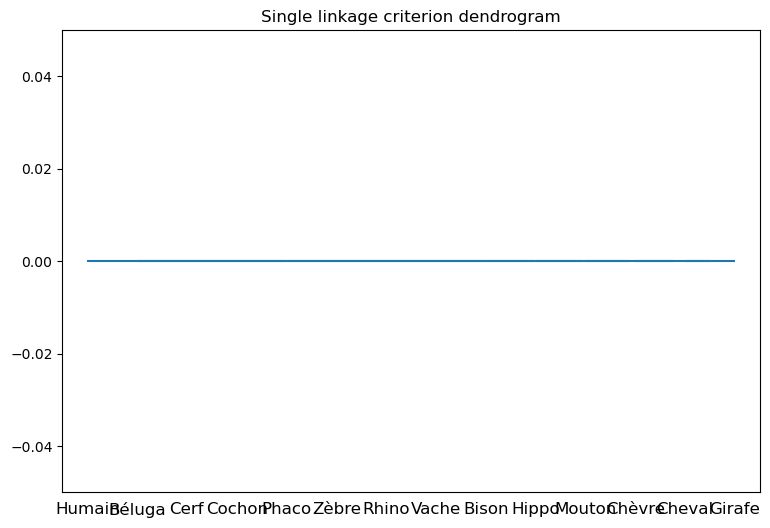

In [9]:
model = AgglomerativeClustering(linkage="single",distance_threshold=0,n_clusters=None,metric='precomputed')
model = model.fit(editdist)
plt.figure(figsize=[9,6])
plot_dendrogram(model,labels=Names)
plt.title('Single linkage criterion dendrogram'); 

In [10]:
# votre code ici (complete linkage): 

In [11]:
# votre code ici (average linkage): 

<font color=red>

_Votre réponse ici_.

</font>